# Second Order Differential Equation

**Problem Statement:** We need to solve the second-order differential equation:

$$\frac{d^2x}{dt^2} + \omega^2 x = 0$$

with the initial conditions:

$$x(0) = 0, \quad x'(0) = v_0$$

where $\omega = \frac{2\pi r}{v_0}$.

**Solution Approach:** We take the values of arbitrary constants as:

$$r = 1, \quad v_0 = 1$$

so that:

$$\omega = 2\pi$$

Now, we introduce a substitution:

$$\frac{dx}{dt} = y$$

which gives:

$$\frac{dy}{dt} = -4\pi^2 x$$

Thus, the given second-order differential equation is transformed into a system of coupled first-order differential equations:

$$\frac{dx}{dt} = y$$

$$\frac{dy}{dt} = -4\pi^2 x$$

This system can be solved using the third-order Runge-Kutta method, which is an efficient numerical technique for solving differential equations.

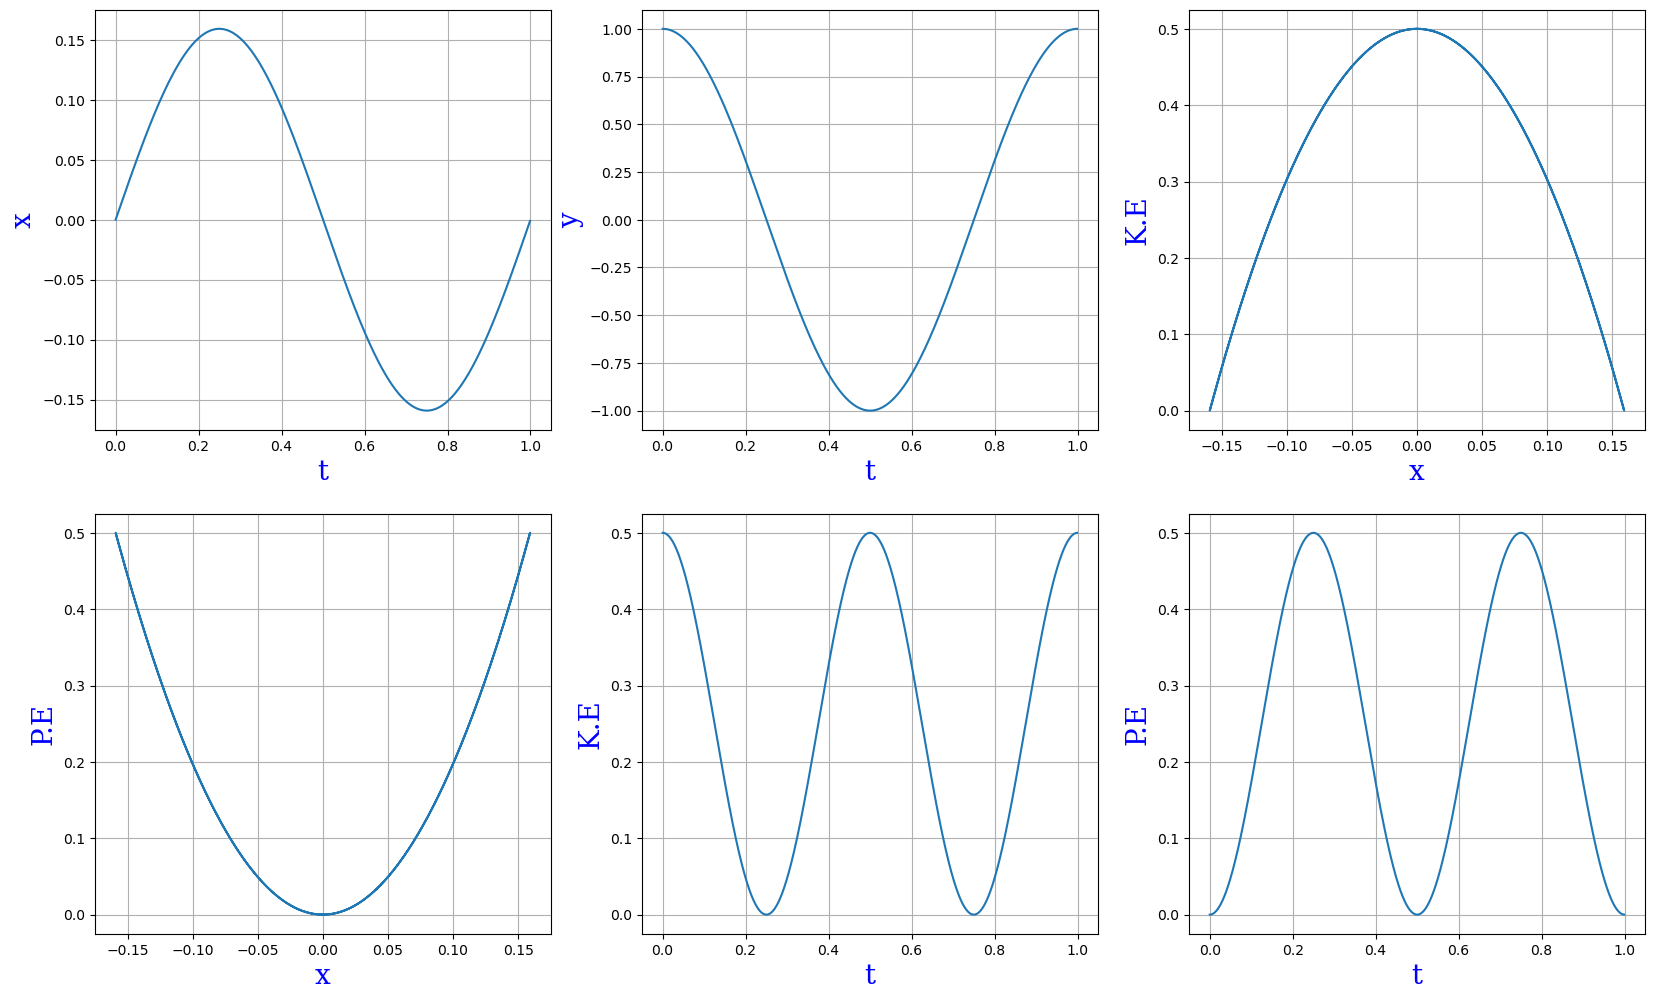

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def dxdt(t, x, y):
    return y

def dydt(t, x, y):
    return -4 * (np.pi)**2 * x

t = 0
x = 0
y = 1
h = 0.001

t_plot = []
x_plot = []
y_plot = []

while t < 1:
    t_plot.append(t)
    x_plot.append(x)
    y_plot.append(y)
    k1 = h * dxdt(t, x, y)
    l1 = h * dydt(t, x, y)
    k2 = h * dxdt(t + (h / 2), x + (k1 / 2), y + (l1 / 2))
    l2 = h * dydt(t + (h / 2), x + (k1 / 2), y + (l1 / 2))
    k3 = h * dxdt(t + (h / 2), x + (k2 / 2), y + (l2 / 2))
    l3 = h * dydt(t + (h / 2), x + (k2 / 2), y + (l2 / 2))
    k4 = h * dxdt(t + h, x + k3, y + l3)
    l4 = h * dydt(t + h, x + k3, y + l3)
    t = t + h
    x = x + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    y = y + (l1 + 2 * l2 + 2 * l3 + l4) / 6
    
k_plot = [i**2 / 2 for i in y_plot]
v_plot = [2 * (np.pi)**2 * i**2 for i in x_plot]
    
fig, axes = plt.subplots(2, 3, figsize=(20,12))
ax = axes[0][0]
ax.plot(t_plot, x_plot)
ax.set_xlabel('t', fontdict={'family':'serif', 'color':'blue', 'fontsize':20})
ax.set_ylabel('x', fontdict={'family':'serif', 'color':'blue', 'fontsize':20})
ax.grid()
ax = axes[0][1]
ax.plot(t_plot, y_plot)
ax.set_xlabel('t', fontdict={'family':'serif', 'color':'blue', 'fontsize':20})
ax.set_ylabel('y', fontdict={'family':'serif', 'color':'blue', 'fontsize':20})
ax.grid()
ax = axes[0][2]
ax.plot(x_plot, k_plot)
ax.set_xlabel('x', fontdict={'family':'serif', 'color':'blue', 'fontsize':20})
ax.set_ylabel('K.E', fontdict={'family':'serif', 'color':'blue', 'fontsize':20})
ax.grid()
ax = axes[1][0]
ax.plot(x_plot, v_plot)
ax.set_xlabel('x', fontdict={'family':'serif', 'color':'blue', 'fontsize':20})
ax.set_ylabel('P.E', fontdict={'family':'serif', 'color':'blue', 'fontsize':20})
ax.grid()
ax = axes[1][1]
ax.plot(t_plot, k_plot)
ax.set_xlabel('t', fontdict={'family':'serif', 'color':'blue', 'fontsize':20})
ax.set_ylabel('K.E', fontdict={'family':'serif', 'color':'blue', 'fontsize':20})
ax.grid()
ax = axes[1][2]
ax.plot(t_plot, v_plot)
ax.set_xlabel('t', fontdict={'family':'serif', 'color':'blue', 'fontsize':20})
ax.set_ylabel('P.E', fontdict={'family':'serif', 'color':'blue', 'fontsize':20})
ax.grid()